<a href="https://colab.research.google.com/github/apfdamascena/deep_learning/blob/main/multiclass_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from keras.datasets import reuters

In [3]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

2113536/2110848 [==============================] - 0s 0us/step


In [4]:
len(train_data)

8982

In [5]:
len(test_data)

2246

In [6]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

In [7]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key,value) in word_index.items()])
decoded_newswire = ''.join([reverse_word_index.get(i-3, '?') for i in train_data[0]])

557056/550378 [==============================] - 0s 0us/step


In [8]:
decoded_newswire

'???saidasaresultofitsdecemberacquisitionofspacecoitexpectsearningspersharein1987of115to130dlrspershareupfrom70ctsin1986thecompanysaidpretaxnetshouldrisetonineto10mlndlrsfromsixmlndlrsin1986andrentaloperationrevenuesto19to22mlndlrsfrom125mlndlrsitsaidcashflowpersharethisyearshouldbe250tothreedlrsreuter3'

In [10]:
# preparing data
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1.
  return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [12]:
from keras.utils.np_utils import to_categorical
one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [13]:
#model definition
from keras import models, layers
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=((10000,))))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))


In [14]:
#compiling model
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [15]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [16]:
#training model
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val,y_val))

Epoch 1/20
16/16 [==============================] - 1s 55ms/step - loss: 2.6537 - accuracy: 0.4877 - val_loss: 1.7501 - val_accuracy: 0.6470
Epoch 2/20
16/16 [==============================] - 1s 41ms/step - loss: 1.4204 - accuracy: 0.7120 - val_loss: 1.2993 - val_accuracy: 0.7220
Epoch 3/20
16/16 [==============================] - 1s 42ms/step - loss: 1.0434 - accuracy: 0.7803 - val_loss: 1.1253 - val_accuracy: 0.7520
Epoch 4/20
16/16 [==============================] - 1s 40ms/step - loss: 0.8185 - accuracy: 0.8269 - val_loss: 1.0197 - val_accuracy: 0.7840
Epoch 5/20
16/16 [==============================] - 1s 41ms/step - loss: 0.6476 - accuracy: 0.8662 - val_loss: 0.9498 - val_accuracy: 0.8000
Epoch 6/20
16/16 [==============================] - 1s 42ms/step - loss: 0.5171 - accuracy: 0.8955 - val_loss: 0.9256 - val_accuracy: 0.8050
Epoch 7/20
16/16 [==============================] - 1s 40ms/step - loss: 0.4118 - accuracy: 0.9132 - val_loss: 0.8761 - val_accuracy: 0.8150
Epoch 8/20
16

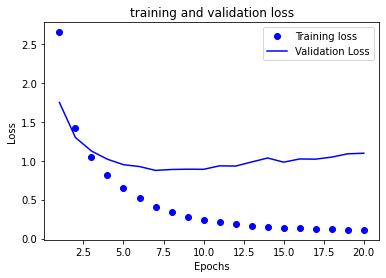

In [17]:
#plotting the training and validation loss

import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss)+1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label="Validation Loss")
plt.title("training and validation loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [21]:
plt.clf()


<Figure size 432x288 with 0 Axes>

In [22]:
#retraining a model from scratch

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape = (10000,)))
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])
model.fit(partial_x_train, partial_y_train, epochs = 9, batch_size=512,
          validation_data = (x_val, y_val))

results = model.evaluate(x_test, one_hot_test_labels)

Epoch 1/9
16/16 [==============================] - 1s 48ms/step - loss: 2.5942 - accuracy: 0.5324 - val_loss: 1.7141 - val_accuracy: 0.6470
Epoch 2/9
16/16 [==============================] - 1s 41ms/step - loss: 1.3901 - accuracy: 0.7179 - val_loss: 1.2906 - val_accuracy: 0.7240
Epoch 3/9
16/16 [==============================] - 1s 41ms/step - loss: 1.0201 - accuracy: 0.7830 - val_loss: 1.1132 - val_accuracy: 0.7700
Epoch 4/9
16/16 [==============================] - 1s 41ms/step - loss: 0.7995 - accuracy: 0.8275 - val_loss: 1.0204 - val_accuracy: 0.7860
Epoch 5/9
16/16 [==============================] - 1s 40ms/step - loss: 0.6326 - accuracy: 0.8672 - val_loss: 0.9591 - val_accuracy: 0.8060
Epoch 6/9
16/16 [==============================] - 1s 43ms/step - loss: 0.5091 - accuracy: 0.8943 - val_loss: 0.9467 - val_accuracy: 0.8100
Epoch 7/9
16/16 [==============================] - 1s 40ms/step - loss: 0.4104 - accuracy: 0.9151 - val_loss: 0.9319 - val_accuracy: 0.8120
Epoch 8/9
16/16 [===

In [23]:
results

[0.9904576539993286, 0.7831701040267944]

In [25]:
import copy
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
float(np.sum(hits_array)) / len(test_labels)

0.19278717720391808

In [26]:
#predictions
predctions = model.predict(x_test)

In [27]:
predctions[0].shape

(46,)

In [28]:
np.sum(predctions[0])

1.0

In [29]:
np.argmax(predctions[0])

3